In [1]:
!uv add -qU langgraph langchain langchain-openai

In [2]:
!uv add -q python-dotenv

In [4]:
from dotenv import load_dotenv

load_dotenv()

True

## Prompt Chaing

### Model 정의

In [5]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-5-nano", temperature=1.0)

### State 정의

In [6]:
from typing import TypedDict

class JokeState(TypedDict):
    topic: str          # 초기 주제
    draft_joke: str     # 1단계: 초안
    improved_joke: str  # 2단계: 수정안
    final_joke: str     # 3단계: 최정 결과

### Node 정의

In [7]:
# [Step 1] 초안 생성 노드
def generate_joke(state: JokeState):
    topic = state["topic"]
    print(f"\n--- [1단계] '{topic}' 주제로 농담 초안 생성 중 ---")

    msg = model.invoke(f"'{topic}에 대한 짧고 재미있는 농담을 하나 만들어줘. 다른말은 하지 말고 농담 하나만 해'")
    return {"draft_joke": msg.content}

In [11]:
# [Step 2] 윤색/수정 노드
def critique_and_improve(state: JokeState):
    original_joke = state["draft_joke"]
    print(f"\n--- [2단계] 더 웃기게 수정 중 (아재개그 스타일) ---")

    prompt = f"""
    다음 농담을 보고, 더 썰렁하고 재미있는 '아재개그' 스타일로 개선해줘. 다른 말은 하지 말고 하나만 답변해.
    원문: {original_joke}
    """
    msg = model.invoke(prompt)
    return {"improved_joke": msg.content}

In [8]:
# [Step 3] 최종 포장 노드
def polish_joke(state: JokeState):
    improved_joke = state["improved_joke"]
    print(f"\n--- [3단계] 이모지 추가 및 마무리 ---")

    prompt = f"""
    다음 농담에 적절한 이모지를 듬뿍 넣어서 SNS에 올리기 좋게 꾸며줘.
    농담: {improved_joke}
    """

    msg = model.invoke(prompt)
    return {"final_joke": msg.content}

## 그래프 생성

In [13]:
from langgraph.graph import StateGraph, START, END

app = StateGraph(JokeState)

app.add_node('generate_joke', generate_joke)
app.add_node('critique_and_improve', critique_and_improve)
app.add_node('polish_joke', polish_joke)

app.add_edge(START, 'generate_joke')
app.add_edge('generate_joke', 'critique_and_improve')
app.add_edge('critique_and_improve', 'polish_joke')
app.add_edge('polish_joke', END)

chain = app.compile()

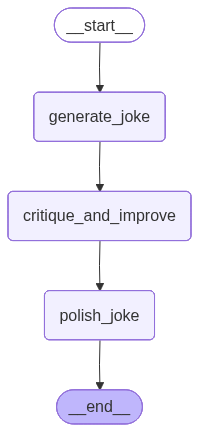

In [14]:
chain

In [15]:
inputs = {"topic": "고양이"}
result = chain.invoke(inputs)


--- [1단계] '고양이' 주제로 농담 초안 생성 중 ---

--- [2단계] 더 웃기게 수정 중 (아재개그 스타일) ---

--- [3단계] 이모지 추가 및 마무리 ---


In [16]:
result

{'topic': '고양이',
 'draft_joke': '고양이가 정글에서 포커를 못하는 이유? 치타가 많아서.',
 'improved_joke': '고양이가 정글에서 포커를 못하는 이유? 치타가 많아서, 핸드가 다 치타다.',
 'final_joke': '좋아요! 이모지 듬뿍 넣은 버전 몇 가지를 드릴게요. 취향에 맞게 골라 사용하거나 섞어서 올리면 좋습니다.\n\n버전 A - 한 줄 캡션\n- 고양이가 정글에서 포커를 못하는 이유? 🐱🌿 치타가 많아서, 핸드가 다 치타다 😂🃏♣️♥️\n\n버전 B - 짧고 재밌는 멘트\n- 고양이가 정글에서 포커를 못하는 이유? 🐱🍃 치타가 많아서 핸드가 다 치타다 😂🐆🃏\n\n버전 C - 스토리/카드 포맷\n- 정글 포커 대회 시작! 🐾\n  고양이: "남은 한 장, 뭔가 이상한데?" 🐈\n  치타가 넘쳐나서 핸드가 다 치타다 😂🐆🃏♣️♥️\n\n해시태그 제안\n- #고양이유머 #동물유머 #포커농담 #정글 #치타 #핸드가다치타다 #SNS펀치라인\n\n필요하면 톤이나 길이를 더 맞춰서 또 다른 버전도 만들어 드릴게요.'}